In [51]:
import tensorflow as tf 

from tensorflow.python.client import device_lib

print(tf.test.is_built_with_cuda())

print(device_lib.list_local_devices())

True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14212871575252918866
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 507131456260149107
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701340352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1771500496772826756
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17467445968517408924
physical_device_desc: "device: XLA_GPU device"
]


In [52]:
#importing libraries
import numpy as np
import pandas as pd
import sys 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Flatten, Dropout, Dense, Embedding, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint

In [53]:
from tensorflow.keras.utils import to_categorical

In [54]:
 ! ls "../input/taylor-swift-song-lyrics-from-all-the-albums"

taylor_swift_lyrics.csv


In [55]:
import pandas as pd
import numpy as np
df= pd.read_csv('../input/taylor-swift-song-lyrics-from-all-the-albums/taylor_swift_lyrics.csv',encoding = "latin1")

In [56]:
df.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [57]:
df.isnull().sum()

artist         0
album          0
track_title    0
track_n        0
lyric          0
line           0
year           0
dtype: int64

In [58]:
df.nunique()

artist            1
album             6
track_title      94
track_n          19
lyric          3155
line            101
year              6
dtype: int64

In [59]:
df.shape

(4862, 7)

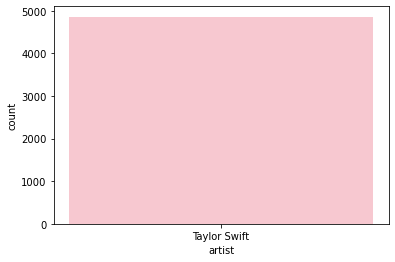

In [60]:

import seaborn as sns
sns.countplot(x='artist',data=df,color='pink')

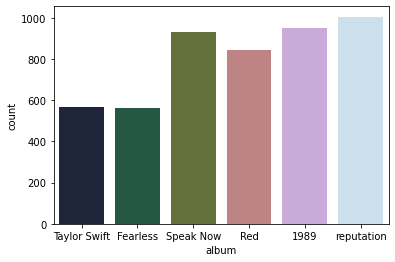

In [61]:
sns.countplot(x='album',data=df,palette='cubehelix')

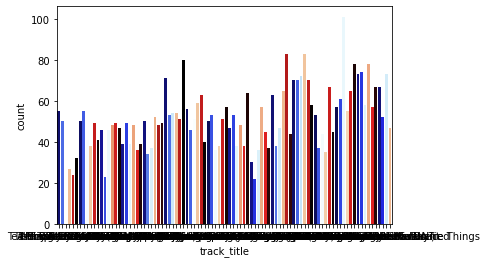

In [62]:
sns.countplot(x='track_title',data=df,palette='flag_r')

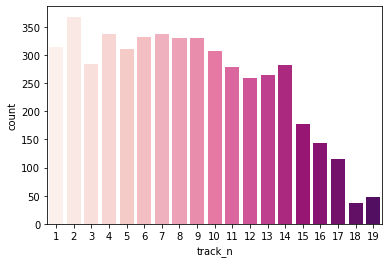

In [63]:
sns.countplot(x='track_n',data=df,palette='RdPu')

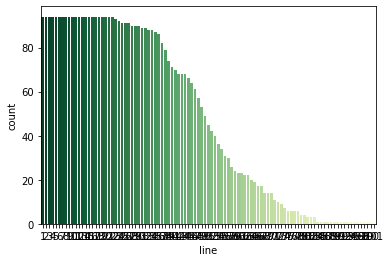

In [64]:
sns.countplot(x='line',data=df,palette='YlGn_r')

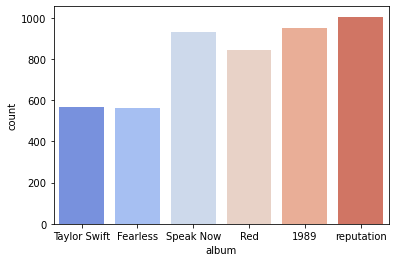

In [65]:
sns.countplot(x='album',data=df,palette='coolwarm')

In [66]:
def processFirstLine(lyrics, songID, songName, row):
    lyrics.append(row['lyric'] + '\n')
    songID.append( row['year']*100+ row['track_n'])
    songName.append(row['track_title'])
    return lyrics,songID,songName

created three lists : 

List songID whose elements are unique identifiers of songs (a linear combination of year and track_n)

List songName whose elements are track_title of songs

List lyrics whose elements are lyrics of songs.

In [67]:
# define empty lists for the lyrics , songID , songName 
lyrics = []
songID = []
songName = []

In [68]:
next(df.iterrows()) # iteration over the dataset , raw wise

(0,
 artist                                Taylor Swift
 album                                 Taylor Swift
 track_title                             Tim McGraw
 track_n                                          1
 lyric          He said the way my blue eyes shined
 line                                             1
 year                                          2006
 Name: 0, dtype: object)

In [69]:
# songNumber indicates the song number in the dataset
songNumber = 1

# i indicates the song number
i = 0
isFirstLine = True

# Iterate through every lyrics line and join them together for each song independently 
for index,row in df.iterrows():
    if(songNumber == row['track_n']):
        if (isFirstLine):
            lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
            isFirstLine = False
        else :
            #if we still in the same song , keep joining the lyrics lines    
            lyrics[i] +=  row['lyric'] + '\n'
    #When it's done joining a song's lyrics lines , go to the next song :    
    else :
        lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
        songNumber = row['track_n']
        i+=1

In [70]:
lyrics[0]

'He said the way my blue eyes shined\nPut those Georgia stars to shame that night\nI said, "That\'s a lie"\nJust a boy in a Chevy truck\nThat had a tendency of gettin\' stuck\nOn backroads at night\nAnd I was right there beside him all summer long\nAnd then the time we woke up to find that summer gone\nBut when you think Tim McGraw\nI hope you think my favorite song\nThe one we danced to all night long\nThe moon like a spotlight on the lake\nWhen you think happiness\nI hope you think that little black dress\nThink of my head on your chest\nAnd my old faded blue jeans\nWhen you think Tim McGraw\nI hope you think of me\nSeptember saw a month of tears\nAnd thankin\' God that you weren\'t here\nTo see me like that\nBut in a box beneath my bed\nIs a letter that you never read\nFrom three summers back\nIt\'s hard not to find it all a little bittersweet\nAnd lookin\' back on all of that, it\'s nice to believe\nWhen you think Tim McGraw\nI hope you think my favorite song\nThe one we danced to 

In [71]:
songID[0]

200601

In [72]:
songName[0]

'Tim McGraw'

In [73]:
# Define a new pandas DataFrame to save songID , songName , Lyrics in it to use them later
lyrics_data = pd.DataFrame({'songID':songID, 'songName':songName, 'lyrics':lyrics })

In [74]:
lyrics_data.head()

,songID,songName,lyrics
0,200601,Tim McGraw,He said the way my blue eyes shined\nPut those...
1,200602,Picture To Burn,"State the obvious, I didn't get my perfect fan..."
2,200603,Teardrops On My Guitar,Drew looks at me\nI fake a smile so he won't s...
3,200604,A Place In This World,"I don't know what I want, so don't ask me\nCau..."
4,200605,Cold as You,You have a way of coming easily to me\nAnd whe...


In [75]:
lyrics_data.shape

(94, 3)

In [76]:
# saving all lyrics to single text file 
with open('lyricsText.txt', 'w',encoding="utf-8") as filehandle:  
    for listitem in lyrics:
        filehandle.write('%s\n' % listitem)

In [77]:
#We load the file in one huge string that we called raw_text , 
#raw_text is then the concatenation of all songs lyrics and we convert the lyrics to lowercase to be able to map them
textFileName = 'lyricsText.txt'
raw_text = open(textFileName, encoding = 'UTF-8').read()
raw_text = raw_text.lower()

In [78]:
len(raw_text)

173698

In [79]:
chars = sorted(list(set(raw_text)))

In [80]:
len(chars)# total unique character in raw_text

58

In [81]:
#created two dictionaries , one to convert chars to ints, the other to convert ints back to chars in order to map characters :
int_chars = dict((i, c) for i, c in enumerate(chars))
chars_int = dict((i, c) for c, i in enumerate(chars))

In [82]:
int_chars

{0: '\n',
 1: ' ',
 2: '!',
 3: '"',
 4: '&',
 5: "'",
 6: '(',
 7: ')',
 8: '+',
 9: ',',
 10: '-',
 11: '.',
 12: '0',
 13: '1',
 14: '2',
 15: '3',
 16: '4',
 17: '5',
 18: '7',
 19: '8',
 20: '9',
 21: ':',
 22: ';',
 23: '<',
 24: '>',
 25: '?',
 26: 'a',
 27: 'b',
 28: 'c',
 29: 'd',
 30: 'e',
 31: 'f',
 32: 'g',
 33: 'h',
 34: 'i',
 35: 'j',
 36: 'k',
 37: 'l',
 38: 'm',
 39: 'n',
 40: 'o',
 41: 'p',
 42: 'q',
 43: 'r',
 44: 's',
 45: 't',
 46: 'u',
 47: 'v',
 48: 'w',
 49: 'x',
 50: 'y',
 51: 'z',
 52: '\x85',
 53: '\x91',
 54: '\x93',
 55: '\x94',
 56: '\x96',
 57: '\x97'}

In [83]:
n_chars = len(raw_text)
n_vocab = len(chars)
print('Number of Characters : ' , n_chars)
print('Number of Alphabet : ', n_vocab)

Number of Characters :  173698
Number of Alphabet :  58


In [84]:
#will have to take a sequence of 100 characters as input and predict the character that follows this sequence
seq_len = 100 #Inputs of the model will be sequences of 100 characters
data_X = []#initializing an empty list data_X that will store sequences of 100 characters
data_y = []#initializing an empty list data_y that will store targets of data_X

In [85]:
for i in range(0, n_chars - seq_len, 1):#looping from 1 to number of sequences of length 100 in raw_text
    seq_in  = raw_text[i:i+seq_len] #taking a sequence of length 100 from raw_text
    seq_out = raw_text[i + seq_len]#taking the character that follows the sequence
    data_X.append([chars_int[char] for char in seq_in])#mapping seq_in to integers and append it to data_X
    data_y.append(chars_int[seq_out])#mapping the seq_out to integer and append it to data_y
n_patterns = len(data_X)
print( 'Total Patterns : ', n_patterns)#number of samples

Total Patterns :  173598


In [86]:
print( 'Total number of sequences : ', len(data_X))

Total number of sequences :  173598


We have 173598 records/samples of 100 sequences and their corresponding targets(the target data_y[i] of a sequence data_X[i] is the character that follow this sequence in the song)

In [87]:
len(data_X), len(data_y)

(173598, 173598)

In [88]:
#We reshape X to be suitable to go into LSTM RNN
X = np.reshape(data_X , (n_patterns, seq_len, 1))# now size will be 173598*100

In [89]:
X[:1]

array([[[33],
        [30],
        [ 1],
        [44],
        [26],
        [34],
        [29],
        [ 1],
        [45],
        [33],
        [30],
        [ 1],
        [48],
        [26],
        [50],
        [ 1],
        [38],
        [50],
        [ 1],
        [27],
        [37],
        [46],
        [30],
        [ 1],
        [30],
        [50],
        [30],
        [44],
        [ 1],
        [44],
        [33],
        [34],
        [39],
        [30],
        [29],
        [ 0],
        [41],
        [46],
        [45],
        [ 1],
        [45],
        [33],
        [40],
        [44],
        [30],
        [ 1],
        [32],
        [30],
        [40],
        [43],
        [32],
        [34],
        [26],
        [ 1],
        [44],
        [45],
        [26],
        [43],
        [44],
        [ 1],
        [45],
        [40],
        [ 1],
        [44],
        [33],
        [26],
        [38],
        [30],
        [ 1],
        [45],
        [33],
      

In [90]:
data_y

[30,
 3,
 0,
 35,
 46,
 44,
 45,
 1,
 26,
 1,
 27,
 40,
 50,
 1,
 34,
 39,
 1,
 26,
 1,
 28,
 33,
 30,
 47,
 50,
 1,
 45,
 43,
 46,
 28,
 36,
 0,
 45,
 33,
 26,
 45,
 1,
 33,
 26,
 29,
 1,
 26,
 1,
 45,
 30,
 39,
 29,
 30,
 39,
 28,
 50,
 1,
 40,
 31,
 1,
 32,
 30,
 45,
 45,
 34,
 39,
 5,
 1,
 44,
 45,
 46,
 28,
 36,
 0,
 40,
 39,
 1,
 27,
 26,
 28,
 36,
 43,
 40,
 26,
 29,
 44,
 1,
 26,
 45,
 1,
 39,
 34,
 32,
 33,
 45,
 0,
 26,
 39,
 29,
 1,
 34,
 1,
 48,
 26,
 44,
 1,
 43,
 34,
 32,
 33,
 45,
 1,
 45,
 33,
 30,
 43,
 30,
 1,
 27,
 30,
 44,
 34,
 29,
 30,
 1,
 33,
 34,
 38,
 1,
 26,
 37,
 37,
 1,
 44,
 46,
 38,
 38,
 30,
 43,
 1,
 37,
 40,
 39,
 32,
 0,
 26,
 39,
 29,
 1,
 45,
 33,
 30,
 39,
 1,
 45,
 33,
 30,
 1,
 45,
 34,
 38,
 30,
 1,
 48,
 30,
 1,
 48,
 40,
 36,
 30,
 1,
 46,
 41,
 1,
 45,
 40,
 1,
 31,
 34,
 39,
 29,
 1,
 45,
 33,
 26,
 45,
 1,
 44,
 46,
 38,
 38,
 30,
 43,
 1,
 32,
 40,
 39,
 30,
 0,
 27,
 46,
 45,
 1,
 48,
 33,
 30,
 39,
 1,
 50,
 40,
 46,
 1,
 45,
 33,
 34,
 

In [91]:
X = X/ float(n_vocab)# normalization
# One hot encode the output targets :
y = tf.keras.utils.to_categorical(data_y)

In [92]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
# performing train test split
from sklearn.model_selection import train_test_split
X,X_test,y,y_test=train_test_split(X,y,random_state=42)


In [94]:
len(data_X) #total number of samples before split

173598

In [95]:
len(X) #number of samples used in training(75%)

130198

In [96]:
len(X_test)

43400

In [97]:
X.shape

(130198, 100, 1)

In [98]:
y.shape

(130198, 58)

In [99]:
#to obtain same results everytime we run code
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
#defining a sequential model
model = Sequential()

#add an LSTM layer as input layer
model.add(LSTM(256, input_shape =(X.shape[1], X.shape[2]), return_sequences = True))

#We add three LSTM layers as hidden layers with 256 nodesin each layer.
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))

#We flatten the data that is coming from the last hidden layer to input it to the output layer
model.add(Flatten())

In [101]:
#We add a dense which is a fully connected neural network layer where each input node is connected to each output node
model.add(Dense(y.shape[1]))
#We also add an activation layer that determines activation function our neural network will use to calculate the output of a node.Since it's a multiclassification problem ,we use softmax function.
model.add(Activation('softmax'))

In [102]:
#Now we compile our model .Since it's a multiclassification problem ,we calculate the loss for each iteration of the training by using categorical cross entropy and optimise our network by using 'adam' optimizer .
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [103]:
#We can see a summary of our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 256)          264192    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 58)                1484858   
_________________________________________________________________
activation (Activation)      (None, 58)               

In [104]:
#training the model with parameters indicated in model_params
model_history=model.fit(X,y,epochs=15, batch_size = 32,verbose=1,validation_split=0.2,shuffle= True,initial_epoch=0)

Epoch 1/15
3255/3255 [==============================] - 123s 38ms/step - loss: 3.0243 - accuracy: 0.1745 - val_loss: 3.0215 - val_accuracy: 0.1748
Epoch 2/15
3255/3255 [==============================] - 122s 37ms/step - loss: 3.0154 - accuracy: 0.1748 - val_loss: 3.0171 - val_accuracy: 0.1748
Epoch 3/15
3255/3255 [==============================] - 122s 37ms/step - loss: 2.8269 - accuracy: 0.2160 - val_loss: 2.7077 - val_accuracy: 0.2380
Epoch 4/15
3255/3255 [==============================] - 122s 38ms/step - loss: 2.6080 - accuracy: 0.2585 - val_loss: 2.5332 - val_accuracy: 0.2823
Epoch 5/15
3255/3255 [==============================] - 123s 38ms/step - loss: 2.3462 - accuracy: 0.3187 - val_loss: 2.3163 - val_accuracy: 0.3392
Epoch 6/15
3255/3255 [==============================] - 124s 38ms/step - loss: 2.0051 - accuracy: 0.4137 - val_loss: 2.1086 - val_accuracy: 0.4118
Epoch 7/15
3255/3255 [==============================] - 125s 38ms/step - loss: 1.6083 - accuracy: 0.5288 - val_loss: 2

In [105]:
model_history.history

{'loss': [3.024348497390747,
  3.015418767929077,
  2.8269026279449463,
  2.6080374717712402,
  2.3461694717407227,
  2.0050671100616455,
  1.6083022356033325,
  1.2197645902633667,
  0.873381495475769,
  0.5938141942024231,
  0.3876347243785858,
  0.2734322249889374,
  0.20865052938461304,
  0.17597688734531403,
  0.1565437763929367],
 'accuracy': [0.17452332377433777,
  0.17481134831905365,
  0.2160179764032364,
  0.25848230719566345,
  0.31871771812438965,
  0.4137176275253296,
  0.5288311839103699,
  0.6388563513755798,
  0.7360644340515137,
  0.8180744647979736,
  0.8822078108787537,
  0.9192572832107544,
  0.9410991072654724,
  0.954425036907196,
  0.9610495567321777],
 'val_loss': [3.021481990814209,
  3.0170624256134033,
  2.7076613903045654,
  2.533156394958496,
  2.316333532333374,
  2.108621835708618,
  2.0282864570617676,
  2.0132007598876953,
  2.1559009552001953,
  2.320856809616089,
  2.645803213119507,
  2.9318904876708984,
  3.1644930839538574,
  3.18410587310791,
  3.

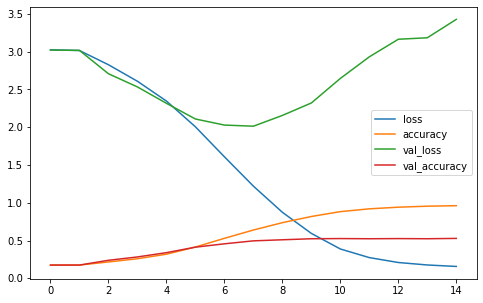

In [106]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))

In [107]:

#Checking the performance of the model
model.evaluate(X_test,y_test)


1357/1357 [==============================] - 18s 14ms/step - loss: 3.4252 - accuracy: 0.5265


[3.4252052307128906, 0.526451587677002]

In [108]:
# saving the model
MODEL_NAME = 'Lyrics_generator.h5'
model.save(f'{MODEL_NAME}')
print(f'{MODEL_NAME} saved successfully')

NameError: name 'model1' is not defined